In [1]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import seaborn as sns
import matplotlib.pyplot as plt
import pathpy as pp
import sys
sys.path.append('/Users/wastechs/Documents/git-repos/wake_effect/turbine_distances')
from interaction_matrix import interaction_matrix

In [2]:
coord = pd.read_csv('/Users/wastechs/Documents/git-repos/wake_effect/data/Pos_WTG_Brasil.csv')

In [3]:
matrix = interaction_matrix(coord)

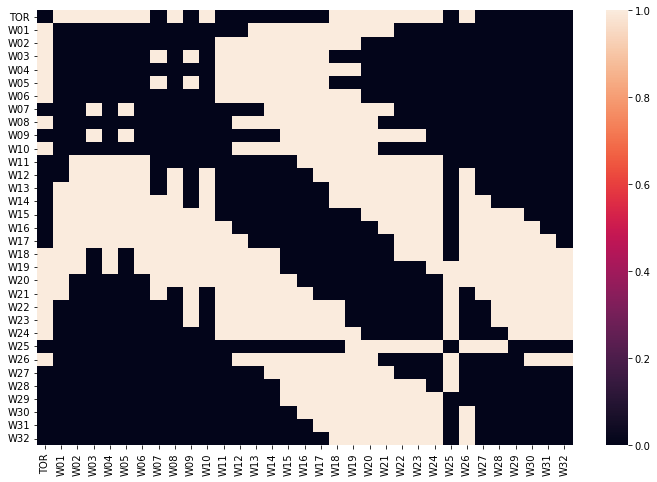

In [6]:
haver_interaction_full = matrix.calculate_haver(tri=False, plot=True)

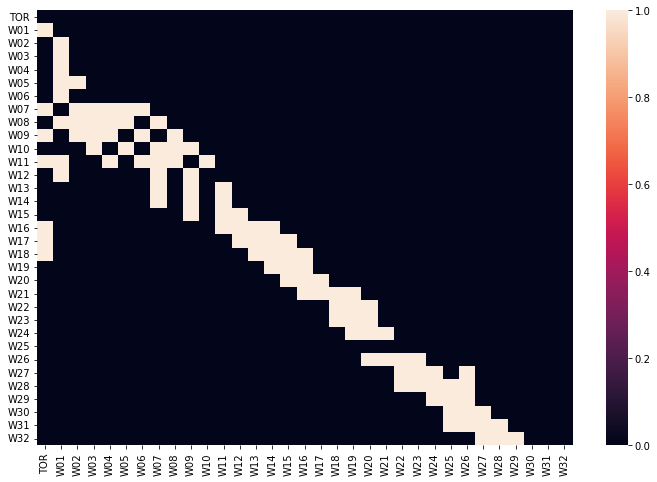

In [7]:
haver_interaction_tri = matrix.calculate_haver(True, True)

In [8]:
euclid_interaction_full_v1 = matrix.calculate_euclidean(threshold=0.004, tri=False, plot=False)
euclid_interaction_full_v2 = matrix.calculate_euclidean(threshold=0.0035, tri=False, plot=False)
euclid_interaction_full_v3 = matrix.calculate_euclidean(threshold=0.003, tri=False, plot=False)
euclid_interaction_full_v4 = matrix.calculate_euclidean(threshold=0.0025, tri=False, plot=False)

In [9]:
euclid_interaction_tri_v1 = matrix.calculate_euclidean(threshold=0.004, tri=True, plot=False)
euclid_interaction_tri_v2 = matrix.calculate_euclidean(threshold=0.0035, tri=True, plot=False)
euclid_interaction_tri_v3 = matrix.calculate_euclidean(threshold=0.003, tri=True, plot=False)
euclid_interaction_tri_v4 = matrix.calculate_euclidean(threshold=0.0025, tri=True, plot=False)

## Building the Network

if 1 then .add_edge between the two nodes (turbines) else nothing

In [10]:
def build_network(interaction, directed=bool):
    
    graph = pp.Network(directed=directed)
    
    cnt = 0
    for row in range(0, 33):
        for turb1 in interaction.iloc[[row]].index:
            for int, adj_turb in zip(interaction.values[row], interaction.columns):
                cnt += 1
                if int == 1:
                    graph.add_edge(turb1, adj_turb)
                else:
                    pass

    print(cnt)
    return graph

In [11]:
haver_full = build_network(haver_interaction_full, True)
haver_tri = build_network(haver_interaction_tri, True)

1089
1089


In [12]:
haver_tri

In [14]:
haver_full

In [15]:
euclid_full_v1 = build_network(euclid_interaction_full_v1, True)
euclid_tri_v1 = build_network(euclid_interaction_tri_v1, True)

1089
1089


In [16]:
euclid_full_v2 = build_network(euclid_interaction_full_v2, True)
euclid_tri_v2 = build_network(euclid_interaction_tri_v2, True)

1089
1089


In [17]:
euclid_full_v3 = build_network(euclid_interaction_full_v3, True)
euclid_tri_v3 = build_network(euclid_interaction_tri_v3, True)

1089
1089


In [18]:
euclid_full_v4 = build_network(euclid_interaction_full_v4, True)
euclid_tri_v4 = build_network(euclid_interaction_tri_v4, True)

1089
1089


In [20]:
euclid_full_v1

In [22]:
euclid_tri_v1

. . . .

In [25]:
euclid_full_v4

In [24]:
euclid_tri_v4

## Measures

### Centrality

 - Degree centrality: How many edges does a node have?
    - A node is central if it has a high degree 
 - Closeness centrality: Indicates how close a node is to all other nodes in the network (the more central a node is, the _closer_ it is to all other nodes)
    - Calculated as the average of the shortest path length from the node to every other node in the network
 - Betweenness centrality: How many shortest paths go through a certain node?
   
### Degrees

 - Rows sums: Out-degree (a turbine affects another turbine)
 - Column sums: In-degree (a turbine is affected by another turbine)
 - Matrix sum: Number of edges
 - Matrix size: Number of nodes


In our network, degree centrality and closeness centrality are the measures of interest. 

In [26]:
def centrality_measures(graph):
    # Calculates betweeness centrality of all nodes
    betweenness = pp.algorithms.centralities.betweenness(graph)
    # Calculates degree centrality of all nodes
    degree = pp.algorithms.centralities.degree(graph)
    # Calculates closeness centrality of all nodes
    closeness = pp.algorithms.centralities.closeness(graph)
    # . . .
    distance_matrix = pp.algorithms.centralities.distance_matrix(graph)
    # . . .
    #rank_centrality = pp.algorithms.centralities.rank_centralities(graph)

    return betweenness, degree, closeness, distance_matrix

In [27]:
def plotter(measure, name):

    df = pd.DataFrame.from_dict(
        measure, orient='index', columns=['measure'])
    
    plt.figure(figsize=(14, 7))
    plt.title(name)
    sns.barplot(x=df.index, y=df.measure, palette='deep')
    plt.xticks(rotation=45)
    plt.xlabel('Turbine')
    plt.ylabel('Count')
    plt.show()

2022-01-17 13:26:41 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-17 13:26:41 [Severity.INFO]	Calculating closeness in network ...
2022-01-17 13:26:41 [Severity.INFO]	finished.


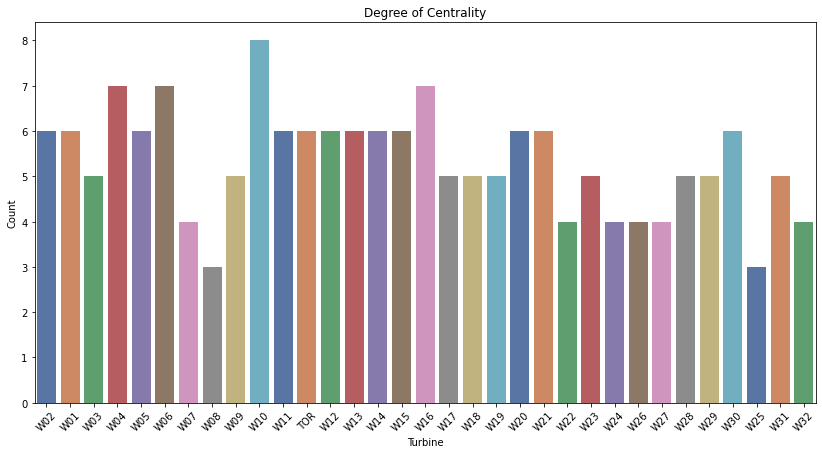

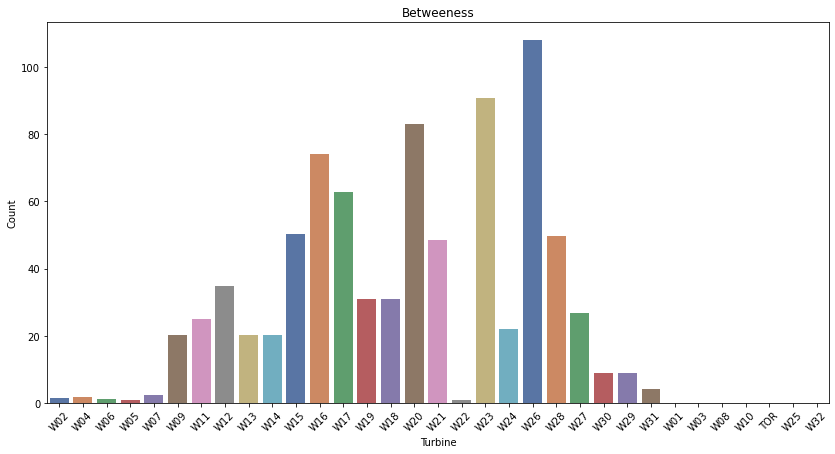

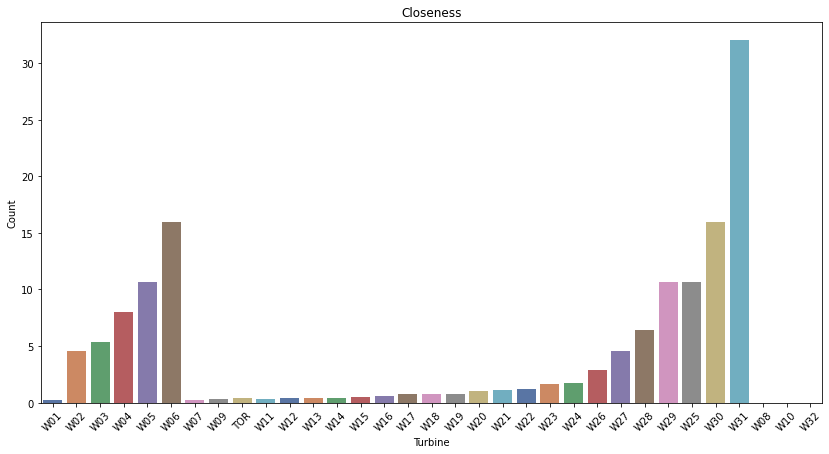

In [29]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_tri_v1)

plotter(degree, 'Degree of Centrality')
plotter(betweenness, 'Betweeness')
plotter(closeness, 'Closeness')

2022-01-17 13:25:51 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-17 13:25:51 [Severity.INFO]	Calculating closeness in network ...
2022-01-17 13:25:51 [Severity.INFO]	finished.


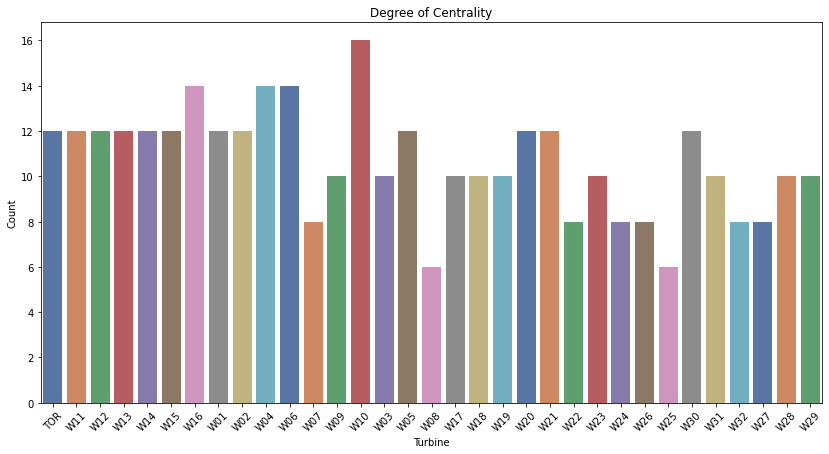

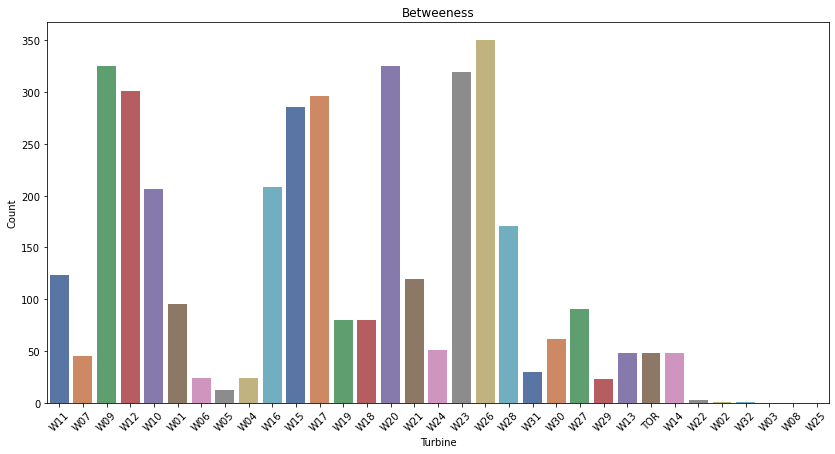

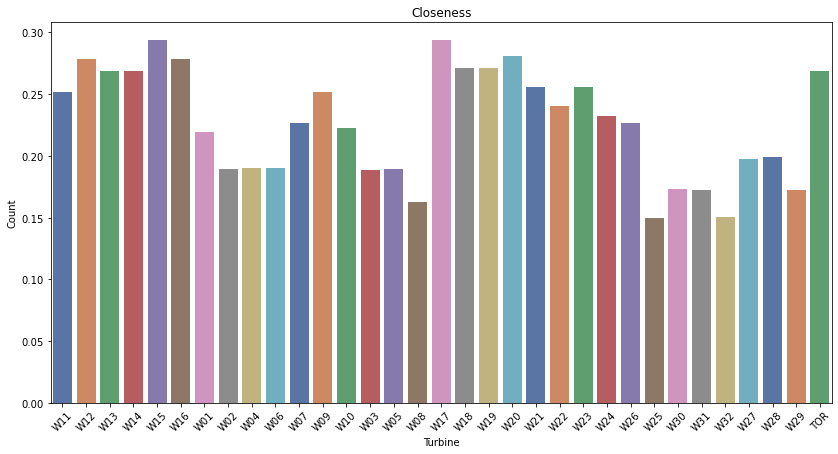

In [28]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_full_v1)

plotter(degree, 'Degree of Centrality')
plotter(betweenness, 'Betweeness')
plotter(closeness, 'Closeness')

2022-01-17 13:27:36 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-17 13:27:36 [Severity.INFO]	Calculating closeness in network ...
2022-01-17 13:27:36 [Severity.INFO]	finished.


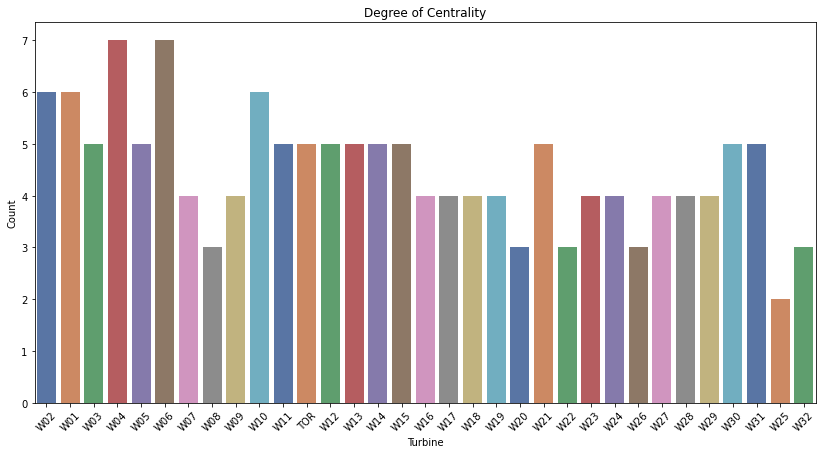

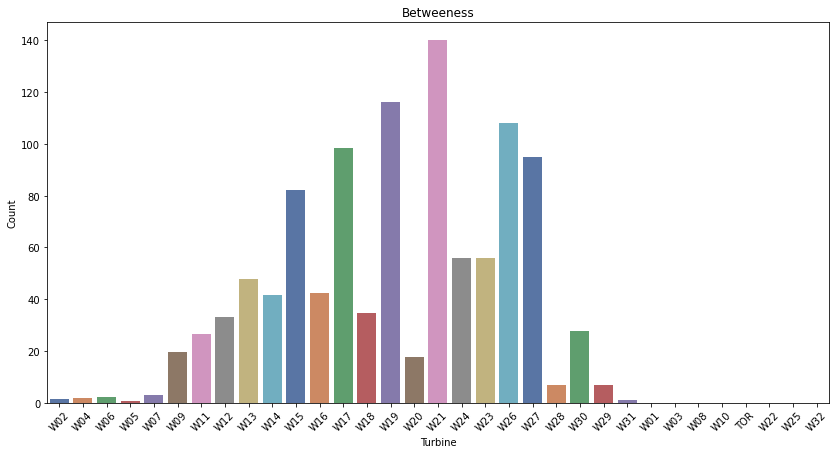

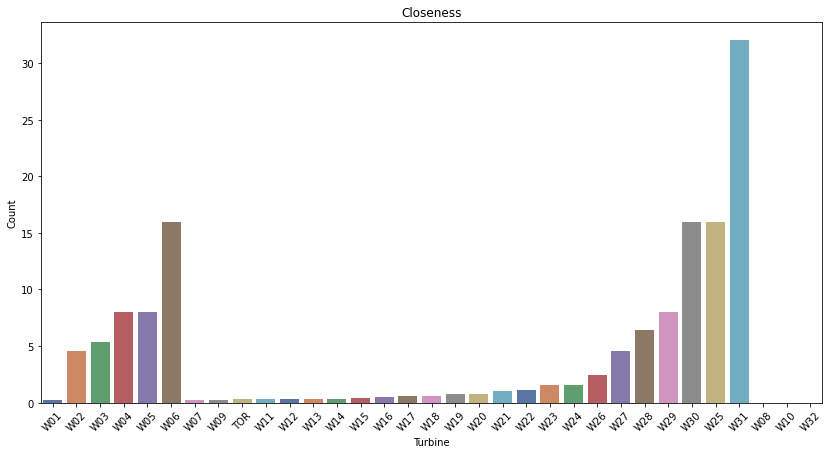

In [32]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_tri_v2)

plotter(degree, 'Degree of Centrality')
plotter(betweenness, 'Betweeness')
plotter(closeness, 'Closeness')

2022-01-17 13:27:42 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-17 13:27:42 [Severity.INFO]	Calculating closeness in network ...
2022-01-17 13:27:42 [Severity.INFO]	finished.


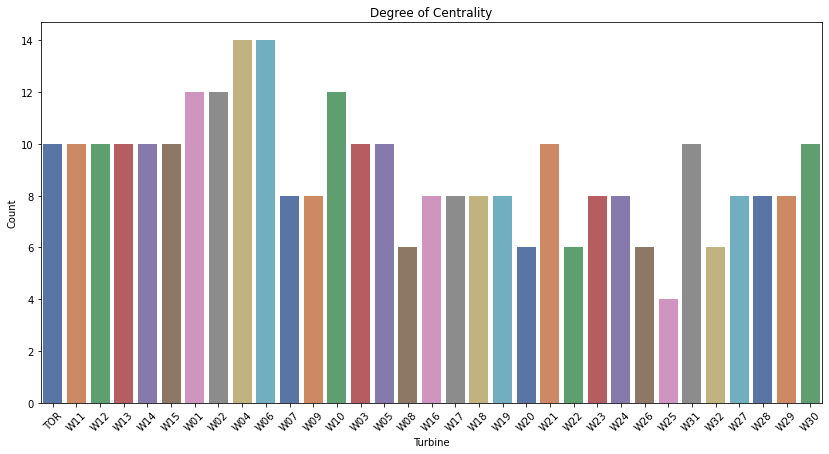

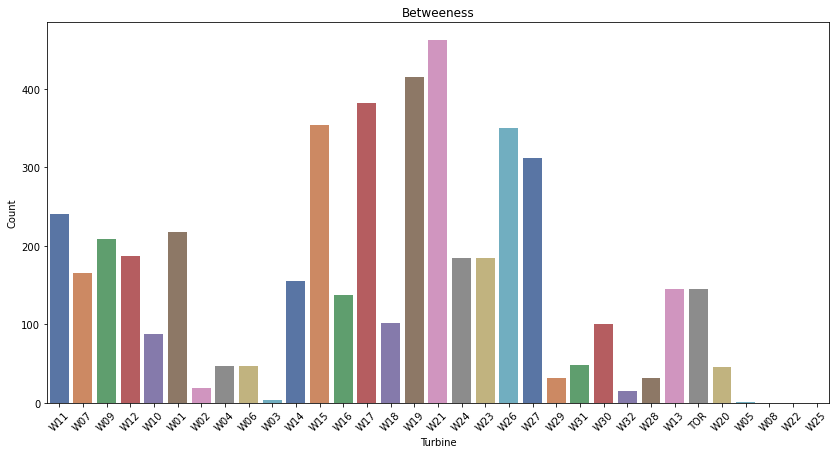

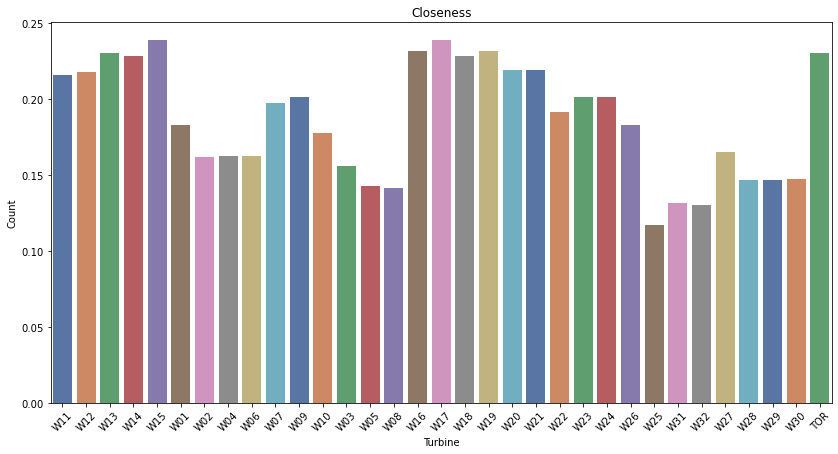

In [33]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_full_v2)

plotter(degree, 'Degree of Centrality')
plotter(betweenness, 'Betweeness')
plotter(closeness, 'Closeness')

2022-01-17 13:27:51 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-17 13:27:51 [Severity.INFO]	Calculating closeness in network ...
2022-01-17 13:27:51 [Severity.INFO]	finished.


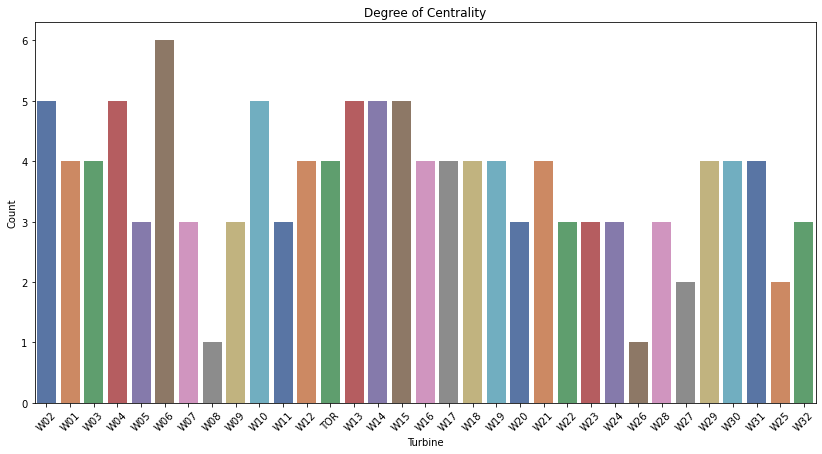

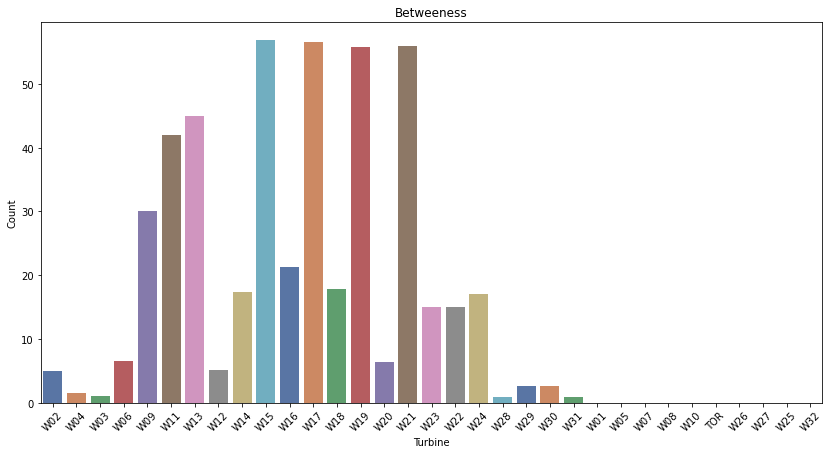

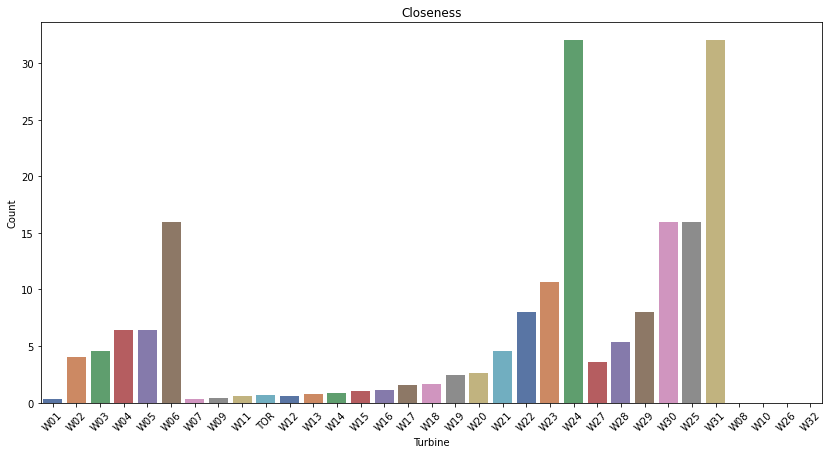

In [34]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_tri_v3)

plotter(degree, 'Degree of Centrality')
plotter(betweenness, 'Betweeness')
plotter(closeness, 'Closeness')

2022-01-17 13:28:02 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-17 13:28:02 [Severity.INFO]	Calculating closeness in network ...
2022-01-17 13:28:02 [Severity.INFO]	finished.


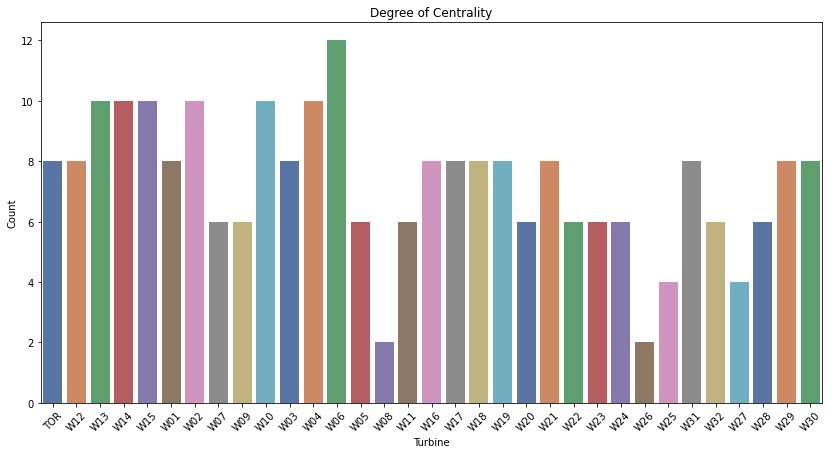

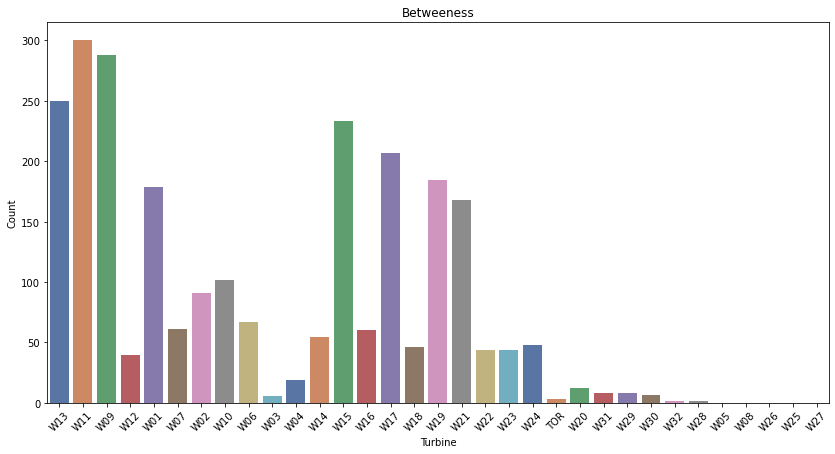

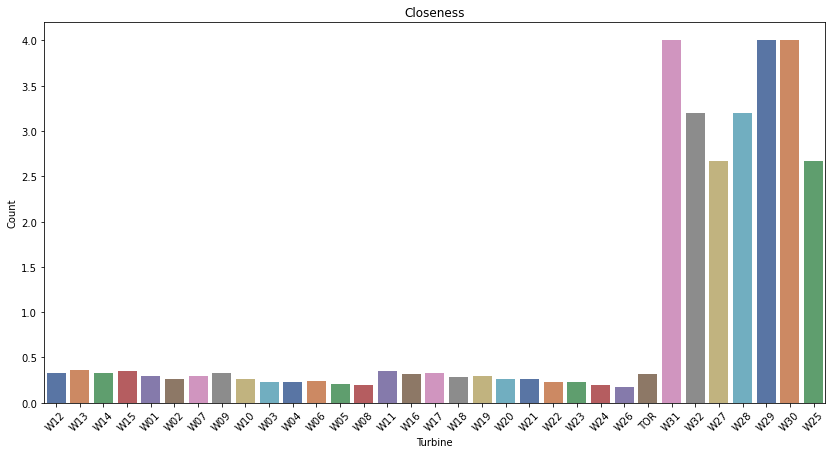

In [35]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_full_v3)

plotter(degree, 'Degree of Centrality')
plotter(betweenness, 'Betweeness')
plotter(closeness, 'Closeness')

2022-01-17 13:28:09 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-17 13:28:09 [Severity.INFO]	Calculating closeness in network ...
2022-01-17 13:28:09 [Severity.INFO]	finished.


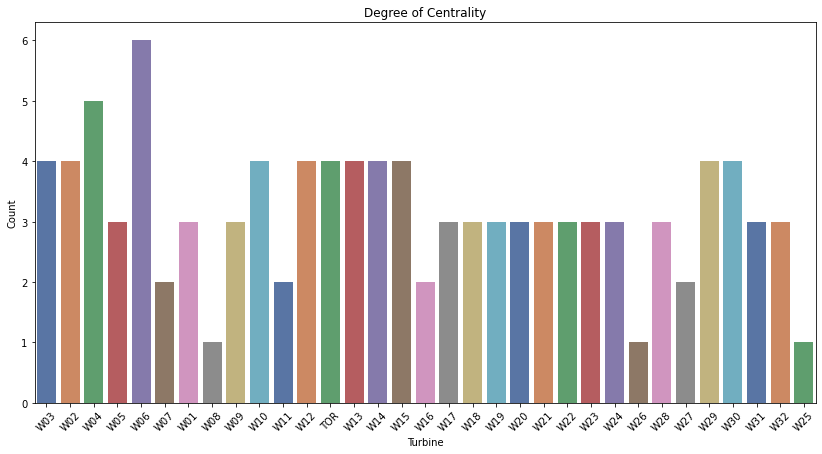

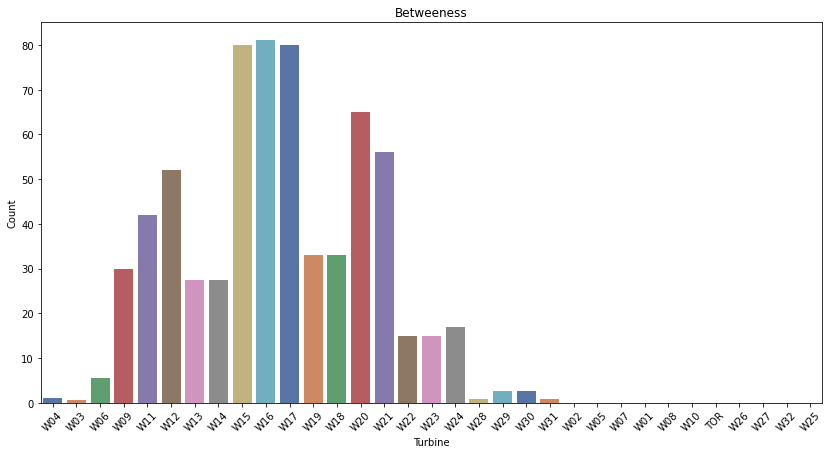

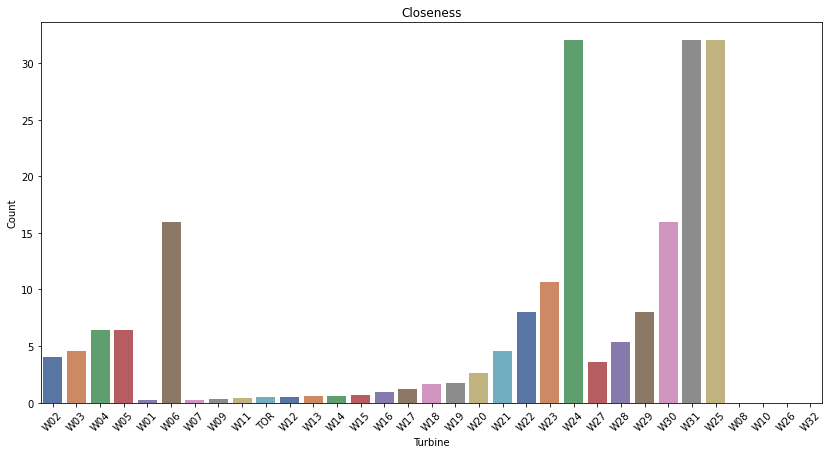

In [36]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_tri_v4)

plotter(degree, 'Degree of Centrality')
plotter(betweenness, 'Betweeness')
plotter(closeness, 'Closeness')

2022-01-17 13:28:43 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-17 13:28:43 [Severity.INFO]	Calculating closeness in network ...
2022-01-17 13:28:43 [Severity.INFO]	finished.


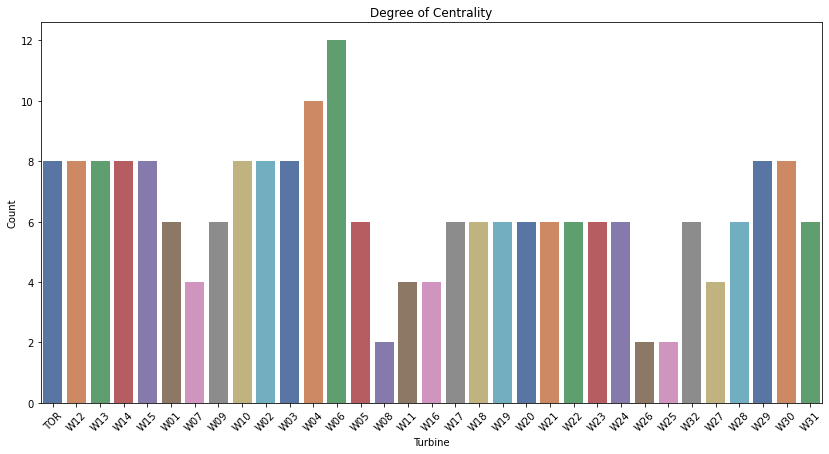

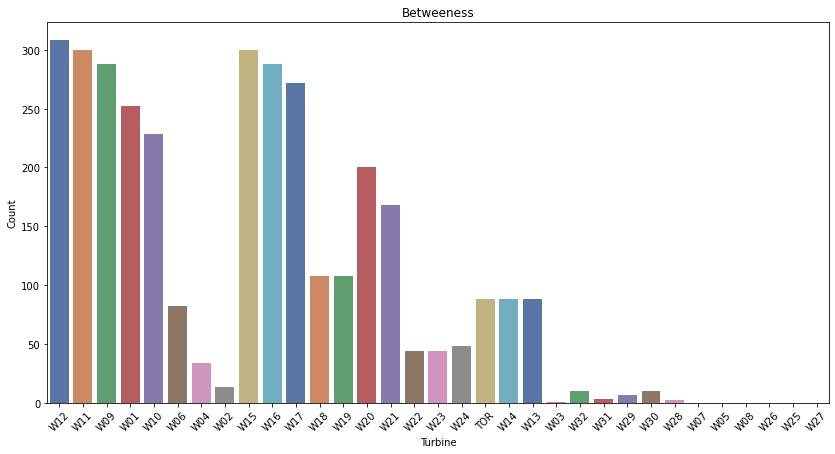

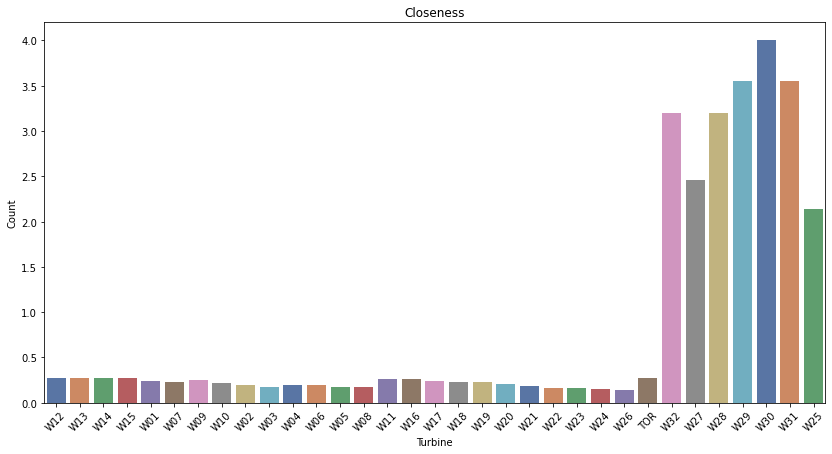

In [37]:
# Euclidean Distances
betweenness, degree, closeness, distance_matrix = centrality_measures(euclid_full_v4)

plotter(degree, 'Degree of Centrality')
plotter(betweenness, 'Betweeness')
plotter(closeness, 'Closeness')

In [ ]:
print(f"Avg degree: {pp.statistics.mean_degree(euclid_graph, degree='indegree')}")
print(f"Avg degree: {pp.statistics.mean_degree(euclid_graph, degree='outdegree')}")

In [38]:
# Haversine Distances
betweenness_h, degree_h, closeness_h, distance_matrix_h = centrality_measures(haver_full)

2022-01-17 13:29:43 [Severity.INFO]	Calculating betweenness centralities ...
2022-01-17 13:29:43 [Severity.INFO]	Calculating closeness in network ...
2022-01-17 13:29:43 [Severity.INFO]	finished.


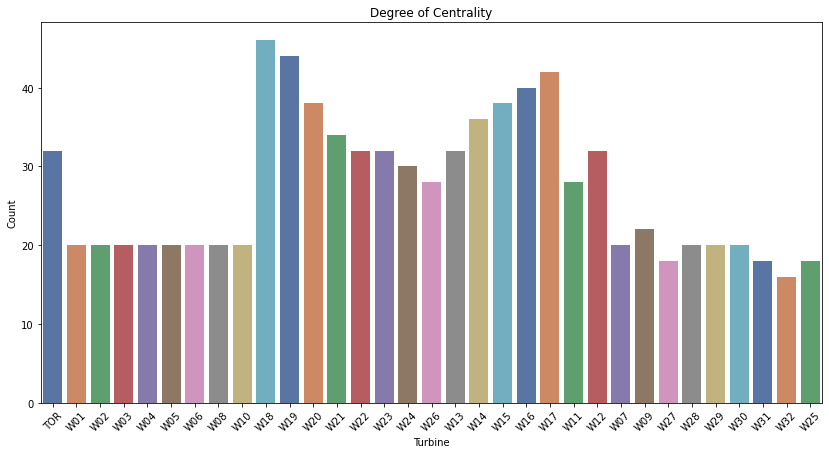

In [40]:
plotter(degree_h, 'Degree of Centrality')

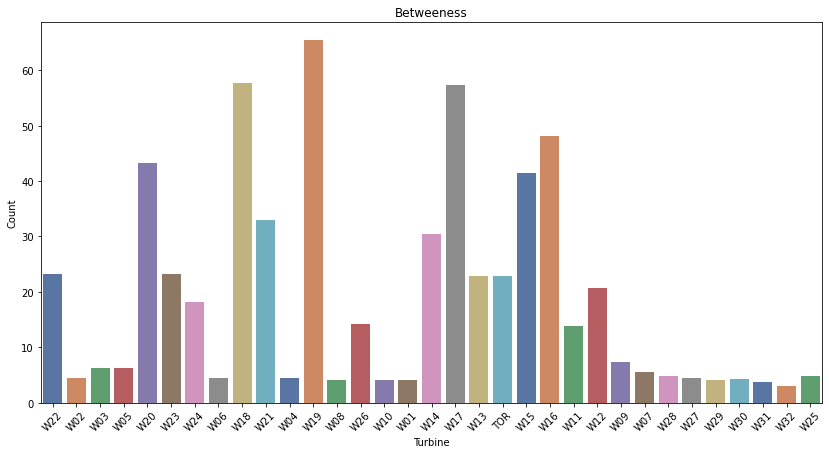

In [41]:
plotter(betweenness_h, 'Betweeness')

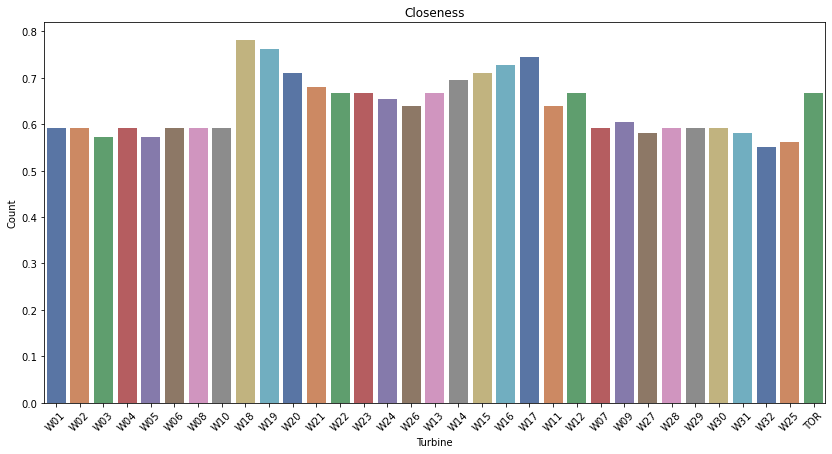

In [42]:
plotter(closeness_h, 'Closeness')

In [ ]:
print(f"Avg degree: {pp.statistics.mean_degree(haver_graph, degree='indegree')}")